# Regularisierung

Wir konnten im letzten Kapitel feststellen, dass komplexere Modelle nicht automatisch besser als einfachere Modelle sind. Eine besondere Herausforderung bei der Verwendung komplexere Modelle ist es, sie so zu trainieren, dass sie nicht nur für Trainings- sondern auch für Testdaten gute Ergebnisse mit sich bringen. Letzteres ist insbesondere für die Identifikation allgemeiner Zusammenhänge von Bedeutung. Je komplexer die Zusammenhänge sind, die Modelle abbilden können, umso mehr besteht die Gefahr darin, dass die Modelle zu sehr an die Trainingsdaten angepasst sind. Bedenkt man, dass sich die Beobachtungen in den Daten teils durch einen deterministischen Zusammenhang und teils durch zufällige Abweichungen zusammensetzen, kann es passieren, dass die zufällige Abweichung der Trainingsdaten mit durch das Modell gelernt wird. Per Definition werden die zufälligen Abweichungen für neue Daten anders sein als in den Trainingsdaten, wodurch das Modelle zum Teil stark abweichende Prognosen generiert. Diese Eigenschaft wird Overfitting genannt und hängt stark mit der höheren Varianz von Schätzern komplexer Modelle zusammen. Zudem werden Modelle nicht nur mit komplexerer funktionaler Form, sondern auch mit der Aufnahme vieler Variablen flexibler. Denken wir an die polynomiale Regression des letzten Kapitels, erhöht sich mit der Aufnahme des Polynoms eines höheren Grades um die gleiche Anzahl der bereits im Modell bestehenden unabhängigen Variablen. Um das Niveau an Flexiblität des Modells nicht manuell auswählen zu müssen, sondern den Grad der Flexibilität beim Training des Modells mit zu trainieren, gibt es verschiedene Techniken, die im Allgemeinen als Regularisierung des Modells bezeichnet werden können. Intuitiv kann Regularisierung als Manipultation des Trainingsprozesses aufgefasst werden, die eine zu spezifische Anpassung des Modells an die Trainingsdaten verhindert und so zu einer verbessertern Generalisierung des Modells verhilft.

## $L_1$ und $L_2$ Regularisierung

Wie in den vorherigen Kapiteln wollen wir das Prinzip der Regularisierung anhand einer konkreten Technik besprechen. Wir fokussieren uns auf die $L_1$ und $L_2$ Regularisierung des Regressionsmodells. Hierzu erinnern wir uns kurz an die gängige Lossfunktion des linearen Regressionsmodells, den MSE:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

Bei der $L_1$ Regularisierung des linaren Regressionsmodells verändert sich die Lossfunktion zu:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2 + \gamma \sum_{j = 1}^p | \beta_j | 
$$

wobei $\gamma$ ein durch den Nutzer festzulegender Hyperparameter ist und $\sum_{q = 1}^p | \beta_q | 1$ die $L_1$ Norm des Parametervektors ohne den $\beta_0$ Parameter darstellt. Wird ein lineares Regressionsmodell mit Hilfe dieser Lossfunktion trainiert, spricht man auch von der Lasso Regression. Eine Alternative hierzu ist die Ridge Regression, bei der die Lossfunktion:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2 + \gamma \sum_{j = 1}^p  \beta_j^2
$$

zum Schätzen des Parametervektors verwendet wird. Mit steigendem Gewicht $\gamma$ werden die Parameter immer mehr in Richtung $0$ gezogen, weshalb diese Art der Regularisierung auch Shrinkage bezeichnet wird. Bei der Lasso Regression ist es so, dass die Variablen mit der geringsten Verbesserung (Minimierung der Lossfunktion) zuerst einen Parameterwert nahe oder gleich $0$ erhalten, was somit als automatische Variablenselektion verstanden werden kann. Bei der Ridge Regression werden eher alle Parameter gleichzeitig in Richtung $0$ verschoben. In der unteren Zelle schauen wir uns die geschätzen Parameter des Regressionsmodells für den Advertising Datensatz an. Im Modell haben wir neben den ursprünglichen Variablen $x_{\text{TV}}$, $x_{\text{radio}}$, $x_{\text{newspaper}}$ auch alle möglichen Interaktionsterme dieser Variablen sowie die quadrierten unabhängigen Variablen mit aufgenommen. Zudem wurden alle Variablen standardisiert, um die geschätzen Parameter besser vergleichen zu können. Für beide Regularisierungsarten zeigt sich, dass die Variablen $x_{\text{TV}}$, $x_{\text{TV}}^2$ und $x_{\text{TV}} x_{\text{radio}}$ am wichtigsten sind. Wir können jedoch auch erkennen, dass bei der Lasso Regression mit steigendem Gewicht der Regularisierung von diesen drei Variablen zuerst die Variable $x_{\text{TV}}^2$ aus dem Modell genommen werden würde, indem der Parameter gegen $0$ geht. Im Vergleich wird bei der Ridge Regression der Einfluss von $x_{\text{TV}}$ und $x_{\text{TV}}^2$ beinahe auf symmetrische Art reduziert. 

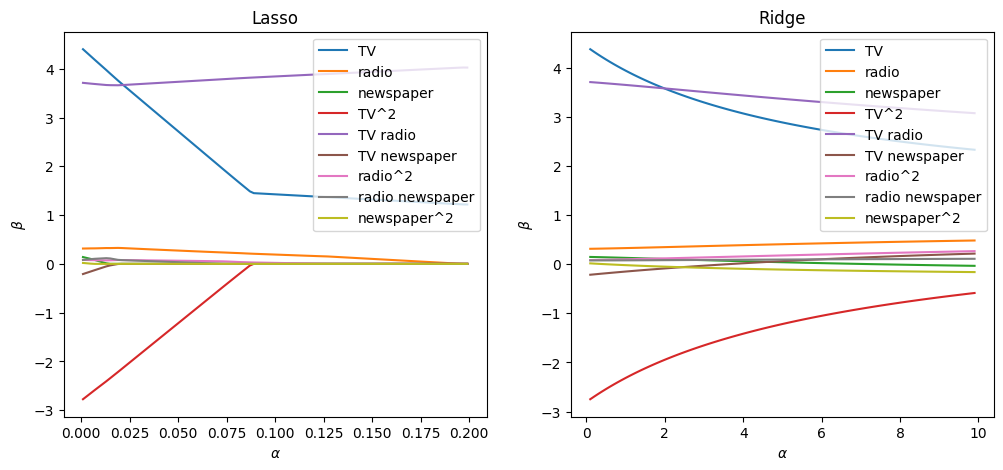

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pylab as plt


advertising_df = pd.read_csv("../Daten/Advertising.csv", index_col= "Unnamed: 0")
advertising_df.reset_index(drop = True, inplace = True)
X = advertising_df.drop(["sales"], axis = 1)
y = advertising_df.sales
polynomial_transformer = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = pd.DataFrame(polynomial_transformer.fit_transform(X))
X_poly.columns = polynomial_transformer.get_feature_names_out()
X_poly = (X_poly - X_poly.mean()) / X_poly.std()

alpha_lasso = np.arange(0.001, 0.2, 0.002)
lasso_coefs = []
for alpha in alpha_lasso:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_poly, y)
    lasso_coefs.append(lasso.coef_)

alpha_ridge = np.arange(0.1, 10, 0.1)
ridge_coefs = []
for alpha in alpha_ridge:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_poly, y)
    ridge_coefs.append(ridge.coef_)


lasso_df = pd.DataFrame(np.array(lasso_coefs), columns = X_poly.columns)
lasso_df.loc[:, "alpha"] = alpha_lasso
ridge_df = pd.DataFrame(np.array(ridge_coefs), columns = X_poly.columns)
ridge_df.loc[:, "alpha"] = alpha_ridge

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

lasso_df.plot(x = "alpha", ax = axs[0], title = "Lasso")
ridge_df.plot(x = "alpha", ax = axs[1], title = "Ridge")
axs[0].set_xlabel(r"$\alpha$")
axs[1].set_xlabel(r"$\alpha$")
axs[0].set_ylabel(r"$\beta$")
axs[1].set_ylabel(r"$\beta$")
plt.show()

Um den positiven Einfluss auf die Performance des Modells zu demonstrieren, kommen wir noch einmal zum synthetischen Beispiels des letzten Kapitels zurück, bei dem das polynomiale Regressionsmodell mit dem Grad $q = 12$ für die Testdaten im Durchschnitt wesentlich höhere Abweichungen zwischen Prognose und Realisierung generiert hat, als für die Trainingsdaten. In der unteren Zelle verwenden wir erneut dieses Modell, jedoch trainieren wir es im Vergleich mit einer $L_1$ Regularisierung. Wie sie sehen können, verbessert sich das Ergebnis der Testdaten deutlich und auch graphisch können wir erkennen, dass das regularisierte Modell deutlich besser den tatsächlichen Zusammenhang abbildet.

/Users/ralfkellner/Library/Mobile Documents/com~apple~CloudDocs/Kurse/VWA/Datenanalyse_und_management/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e-01, tolerance: 1.393e-03
  model = cd_fast.enet_coordinate_descent(


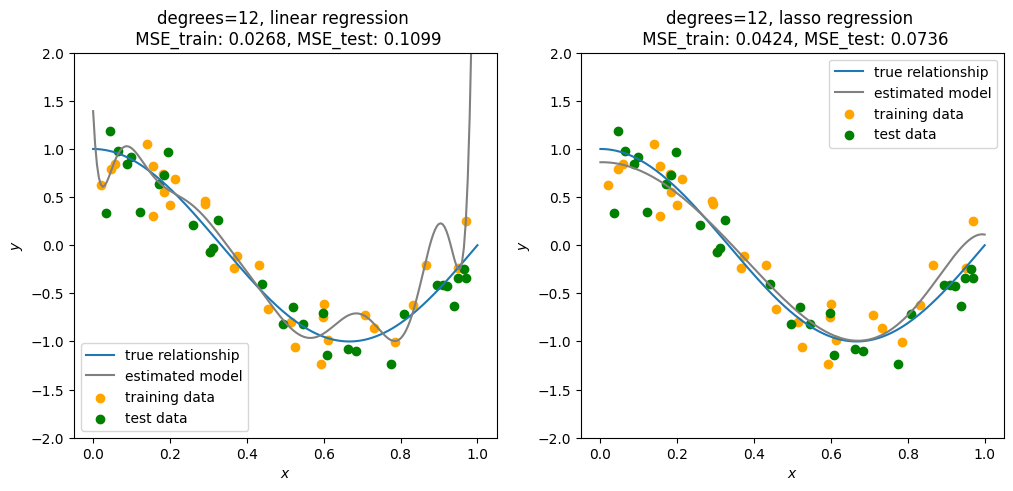

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

# let us define a true functional relationship which is more complex than a simple linear relationship
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# generate some sample data
np.random.seed(42)

n_samples = 30
degrees = [1, 4, 15]

# these values are for plotting the function
X_range = np.linspace(0, 1, 200)
# some training and some test data samples
X_train = np.sort(np.random.rand(n_samples))
X_test = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * 0.25
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.25


def plot_poly_regression(degrees, sklearn_linear_model, main_title, ax = None):
    if ax == None:
        ax = plt.gca()

    polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
    X_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    regression_model = sklearn_linear_model
    regression_model.fit(X_poly, y_train)

    ax.plot(X_range, true_fun(X_range), label = 'true relationship')
    ax.plot(X_range, regression_model.predict(polynomial_features.transform(X_range.reshape(-1, 1))), label = 'estimated model', color = 'grey')
    ax.scatter(X_train, y_train, label = 'training data', color = 'orange')
    ax.scatter(X_test, y_test, label = 'test data', color = 'green')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim(-2, 2)
    ax.legend()
    mse_train = mean_squared_error(y_train, regression_model.predict(polynomial_features.transform(X_train.reshape(-1, 1))))
    mse_test = mean_squared_error(y_test, regression_model.predict(polynomial_features.transform(X_test.reshape(-1, 1))))
    ax.set_title(f'{main_title} \n MSE_train: {mse_train:.4f}, MSE_test: {mse_test:.4f}')

    return ax


fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_poly_regression(12, LinearRegression(), main_title = 'degrees=12, linear regression', ax = axs[0], )
plot_poly_regression(12, Lasso(alpha = 0.0001), main_title = 'degrees=12, lasso regression', ax = axs[1])
plt.show()

# Wahl des Tuning Parameters

Bisher haben wir noch nicht darüber gesprochen, in welcher Stärke die Regularisierung beim Schätzen des Modells mit einbezogen werden sollte. Dies wird über die Wahl des $\alpha$ Parameters festgelegt. Es handelt sich hierbei um einen Parameter, der nicht durch die Daten trainiert, sondern extern festgelegt werden muss. Man spricht deshalb von einem Hyperparameter. Ein Vorgehen diesen zu bestimmen besteht darin, verschiedene Werte für $\alpha$ auszuprobieren und den Wert zu verwenden, der den niedrigsten Testfehler generiert. Zwei Aspekte sind hierbei jedoch kritisch zu betrachten. Wenn die Informationen der Testdaten zur Optimierung des Hyperparameters verwendet werden, haben wir keine Performance des finalen Modells evaluiert, welche unabhängig von den Informationen bekannter Daten besteht. Zudem gelten auch für diese Evaluation der Modellgüte die genannten Aspekte des vorletzten Kapitels, weshalb ein Form der Kreuzvalidierung der des einfachen Aufteilens der Daten vorzuziehen ist. Für einen Datensatz bietet es sich an zunächst einen Teil der Daten vorzuhalten und mit den übrigen Daten eine K-Fold Kreuzvalidierung für verschiedene Werte von $\alpha$ durchzuführen. Der beste Wert von $alpha$ kann dann verwendet werden, um das Modell noch einmal mit allen Daten zu trainieren und anschließend dieses Modell anhand dervorgehaltenen Daten zu evaluieren. Wiederholen und unterschiedliches Aufteilen der (vorgehaltenen) Daten, kann zu unterschiedlichen besten Werten für $\alpha$ führen. Dies gibt jedoch potentiell weitere Einblicke, wie sensitiv der beste Wert für $\alpha$ gegenüber unterschiedlichen Stichproben ist.